# Extract comments from the ICOADS data and analyze the comments

In [1]:
import os
import pandas as pd
import gzip
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# all data we need should be stored in this directory
# all newly generated data and graphs will be stored here too
file_dir = "/Users/Sienna/Desktop/ICOADS/"

## Load the dataframe

In [ ]:
ship_df = pd.read_csv(f'{file_dir}grid_ICOADS_R3.0_Rqst747821_17950101-18360101.csv')

In [ ]:
# add a column to the df
ship_df["comments"] = "NaN"

In [ ]:
ship_df.head()

## Write data into the dataframe

In [ ]:
directory = f'{file_dir}IMMMA1 - 1795-1835/'


for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        
        try:
            f_lines = []
            with gzip.open(f, 'rt', encoding='latin-1') as f:
                for line in f:
                    f_lines.append(line)

            for line in f_lines:
                size = len(line)
                uid = line[177:183]

                # comment 1
                comment1 = ""
                start_index = 307
                i = start_index
                consecutive_space_count = 0
                while i < size and consecutive_space_count <= 3:
                    if line[i] != "\n":
                        comment1 = comment1 + line[i]
                    if line[i-1] == " " and line[i] == " ":
                        consecutive_space_count += 1
                    i += 1

                # comment 2
                comment2 = ""
                start_index = 407
                i = start_index
                consecutive_space_count = 0
                while i < size and consecutive_space_count <= 3:
                    if line[i] != "\n":
                        comment2 = comment2 + line[i]
                    if line[i-1] == " " and line[i] == " ":
                        consecutive_space_count += 1
                    i += 1

                # comment 3
                comment3 = ""
                start_index = 1600
                i = start_index
                consecutive_space_count = 0
                while i < size and consecutive_space_count <= 3:
                    if line[i] != "\n":
                        comment3 = comment3 + line[i]
                    if line[i-1] == " " and line[i] == " ":
                        consecutive_space_count += 1
                    i += 1

                # comment 4
                comment4 = ""
                start_index = 1775
                i = start_index
                consecutive_space_count = 0
                while i < size and consecutive_space_count <= 3:
                    if line[i] != "\n":
                        comment4 = comment4 + line[i]
                    if line[i-1] == " " and line[i] == " ":
                        consecutive_space_count += 1
                    i += 1

                # comment 5
                comment5 = ""
                start_index = 2017
                i = start_index
                consecutive_space_count = 0
                while i < size and consecutive_space_count <= 3:
                    if line[i] != "\n":
                        comment5 = comment5 + line[i]
                    if line[i-1] == " " and line[i] == " ":
                        consecutive_space_count += 1
                    i += 1

                # comment 6
                comment6 = ""
                start_index = 2167
                i = start_index
                consecutive_space_count = 0
                while i < size and consecutive_space_count <= 3:
                    if line[i] != "\n":
                        comment6 = comment6 + line[i]
                    if line[i-1] == " " and line[i] == " ":
                        consecutive_space_count += 1
                    i += 1

                # comment 7
                comment7 = ""
                start_index = 2267
                i = start_index
                consecutive_space_count = 0
                while i < size and consecutive_space_count <= 3:
                    if line[i] != "\n":
                        comment7 = comment7 + line[i]
                    if line[i-1] == " " and line[i] == " ":
                        consecutive_space_count += 1
                    i += 1

                # comment 8
                comment8 = ""
                start_index = 2511
                i = start_index
                consecutive_space_count = 0
                while i < size and consecutive_space_count <= 2:
                    if line[i] != "\n":
                        comment8 = comment8 + line[i]
                    if line[i-1] == " " and line[i] == " ":
                        consecutive_space_count += 1
                    i += 1

                # extra, comment 9 i guess
                comment9 = ""
                start_index = 2417
                i = start_index
                consecutive_space_count = 0
                while i < size and consecutive_space_count <= 2:
                    if line[i] != "\n":
                        comment9 = comment9 + line[i]
                    if line[i-1] == " " and line[i] == " ":
                        consecutive_space_count += 1
                    i += 1

                comments = comment1 + "," + comment2 + "," + comment3 + "," + comment4 + \
                "," + comment5 + "," + comment6 + "," + comment7 + "," + comment8 + "," + comment9

                ship_df.loc[ship_df['UID'] == uid, "comments"] = comments
                
        except Exception as e:
            print(f"An error occurred: {e}")
            print(f"File name: {filename}")
            print()

In [ ]:
len(ship_df['comments'].unique())

In [ ]:
ship_df.head()

In [ ]:
ship_df.to_csv(f'{file_dir}ship_data_zone_comments.csv', encoding='latin-1')

# drop the rows where target_zone is -1
ship_clean_df = ship_df[ship_df["target_zone"] != -1]
ship_clean_df.to_csv(f'{file_dir}clean_ship_data_zone_comments.csv', encoding='latin-1')

# divide the df into 5 csv files corresponding to target zones
# save those 5 csv files
zones = [1, 2, 3.1, 3.2, 4]

for zone in zones:
    zone_df = ship_clean_df[ship_clean_df['target_zone']==zone]
    path = f'{file_dir}zone{zone}_ICOADS_comments.csv'
    zone_df.to_csv(path, encoding='latin-1')

## Verification Script

The script helps verify whether the main code does extract the needed comments. Some other infomation may be mistakenly extracted, but as long as the real comments are also extracted, it is okay.

In [ ]:
# The file to be verified
file_name = f"{file_dir}IMMMA1 - 1795-1835/IMMA1_R3.1.0_1795-01.gz"

f1_lines = []
with gzip.open(file_name, 'rt', encoding='latin-1') as f1:
    for line in f1:
        f1_lines.append(line)
        print(line)

In [ ]:
# Print all entries' extracted info
for line in f1_lines:
    size = len(line)
    uid = line[177:183]

    # comment 1
    comment1 = ""
    start_index = 307
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment1 = comment1 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 2
    comment2 = ""
    start_index = 407
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment2 = comment2 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 3
    comment3 = ""
    start_index = 1600
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment3 = comment3 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 4
    comment4 = ""
    start_index = 1775
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment4 = comment4 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 5
    comment5 = ""
    start_index = 2017
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment5 = comment5 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 6
    comment6 = ""
    start_index = 2167
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment6 = comment6 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 7
    comment7 = ""
    start_index = 2267
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment7 = comment7 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 8
    comment8 = ""
    start_index = 2511
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 2:
        if line[i] != "\n":
            comment8 = comment8 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # extra
    comment9 = ""
    start_index = 2417
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 2:
        if line[i] != "\n":
            comment9 = comment9 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1


    print(uid, comment1, comment2, comment3, comment4, comment5, comment6, comment7, comment8, comment9)

# f1_lines[i][307:327], f1_lines[i][407:427], f1_lines[i][1600:1620], \
#           f1_lines[i][1775:1795], f1_lines[i][2017:2027], f1_lines[i][2167:2187],\
#           f1_lines[i][2267:2287], f1_lines[i][2511:2531]

In [ ]:
# Print a specific entry and its extracted info, by ID; can also print two

id1 = "CZ74IP"
id2 = "CZ74IT"

for line in f1_lines:
    size = len(line)
    uid = line[177:183]

    # comment 1
    comment1 = ""
    start_index = 307
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment1 = comment1 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 2
    comment2 = ""
    start_index = 407
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment2 = comment2 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 3
    comment3 = ""
    start_index = 1600
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment3 = comment3 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 4
    comment4 = ""
    start_index = 1775
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment4 = comment4 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 5
    comment5 = ""
    start_index = 2017
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment5 = comment5 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 6
    comment6 = ""
    start_index = 2167
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment6 = comment6 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 7
    comment7 = ""
    start_index = 2267
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 3:
        if line[i] != "\n":
            comment7 = comment7 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # comment 8
    comment8 = ""
    start_index = 2511
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 2:
        if line[i] != "\n":
            comment8 = comment8 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    # extra
    comment9 = ""
    start_index = 2417
    i = start_index
    consecutive_space_count = 0
    while i < size and consecutive_space_count <= 2:
        if line[i] != "\n":
            comment9 = comment9 + line[i]
        if line[i-1] == " " and line[i] == " ":
            consecutive_space_count += 1
        i += 1

    if uid == id1 or uid == id2:
        print(line)
        print(uid, comment1, comment2, comment3, comment4, comment5, comment6, comment7, comment8, comment9)
        print()


In [ ]:
# Implement only to find the index of a specific string
string = "004GZQ"

for i in range(len(f1_lines)):
    if f1_lines[i].find(string) != -1:
        print(f1_lines[i][177:183], "at", f1_lines[i].find(string))

In [ ]:
# Print a specific entry by ID
id = "002Z2V"

for i in range(len(f1_lines)):
    if f1_lines[i][177:183] == id:
        print(f1_lines[i])

# Calculate zone statistics

## Daily statistics

In [3]:
# We will go zone by zone and day by day to calculate the percentage
# of datapoints (rows) on that day in that zone that mention rain
zones = ["1", "2", "3.1", "3.2", "4"]

In [4]:
# a function to help determine whether a string mentions rain
def contains_weather_terms(text):
    # Define the regex pattern
    pattern = re.compile(r'.*RAIN.*|.*REGEN.*|.*SHOWER.*|.*BUI.*|.*SLEET.*|.*DRIZZL.*|.*LLOV.*|.*LLUV.*|.*PLUI.*', 
                         re.IGNORECASE)
    
    # Search for the pattern in the text
    return bool(pattern.search(text))

In [5]:
# for each zone, we make a new csv that contains the daily rainfall statistic
columns = ["date", "line_count", "rain_mentioned", "rainfall_percentage"]

for zone in zones:
    
    # for each zone, we make a new csv that contains the daily rainfall statistic
    zone_stat_df = pd.DataFrame(columns=columns)
    
    # open the zone comment file
    zone_comment_file_path = f"{file_dir}zone{zone}_ICOADS_comments.csv"
    zone_comment_df = pd.read_csv(zone_comment_file_path, encoding='latin-1')
    
    # all the dates that are mentioned in the comment csv
    dates_listed = []
    for index, row in zone_comment_df.iterrows():
        year = int(row["YR"])
        month = int(row["MO"])
        day = int(row["DY"])
        date =  f"{year:04d}-{month:02d}-{day:02d}"
        if date not in dates_listed:
            dates_listed.append(date)
            
            # make a mini df that only has data of that day
            day_df = zone_comment_df[(zone_comment_df["YR"]==year) & (zone_comment_df["MO"]==month) 
                                    & (zone_comment_df["DY"]==day)]
            
            #calculate how many rows have mentions of rain
            rain_mention = 0
            for index, row in day_df.iterrows():
                comments = str(row["comments"])
                if contains_weather_terms(comments):
                    rain_mention += 1
            
            line_count = day_df.shape[0]
            new_stat_row = {"date": date, "line_count": line_count, "rain_mentioned": rain_mention,
                           "rainfall_percentage": round(rain_mention/line_count, 4)}
            
            zone_stat_df.loc[len(zone_stat_df.index)] = new_stat_row
        else:
            pass
    
    zone_stat_path = f"{file_dir}zone{zone}_daily_rain_percentage.csv"
    zone_stat_df.to_csv(zone_stat_path)

/Users/Sienna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Monthly statistics

In [6]:
# now we also collect monthly data (not day-to-day)
for zone in zones:
    zone_daily_stat_path = f"{file_dir}zone{zone}_daily_rain_percentage.csv"
    zone_daily_stat_df= pd.read_csv(zone_daily_stat_path)

    # Convert the 'date' column to datetime format
    zone_daily_stat_df['date'] = pd.to_datetime(zone_daily_stat_df['date'])

    # Extract year and month from the 'date' column
    zone_daily_stat_df['year'] = zone_daily_stat_df['date'].dt.year
    zone_daily_stat_df['month'] = zone_daily_stat_df['date'].dt.month

    # Group by year and month and sum 'line_count' and 'rain_mentioned'
    monthly_df = zone_daily_stat_df.groupby(['year', 'month'], as_index=False).agg({
        'line_count': 'sum',
        'rain_mentioned': 'sum'
    })

    # Calculate the percentage
    monthly_df['rainfall_percentage'] = round(monthly_df['rain_mentioned'] / monthly_df['line_count'], 4)

    monthly_df_path = f"{file_dir}zone{zone}_monthly_rain_percentage.csv"
    monthly_df.to_csv(monthly_df_path, index=False)

In [7]:
# We now also need AT and SLP data, we will expand the previous monthly rain data csv
for zone in zones:
    monthly_df_path = f"{file_dir}zone{zone}_monthly_rain_percentage.csv"
    monthly_df = pd.read_csv(monthly_df_path)
    
    # add more columns
    new_columns = ['at_count', 'avg_at', 'slp_count', 'avg_slp']

    # Add new columns with NaN values
    for column in new_columns:
        monthly_df[column] = np.nan
    
    # open another csv file that has AT and SLP data
    comment_file_path = f"{file_dir}zone{zone}_ICOADS_comments.csv"
    comment_df = pd.read_csv(comment_file_path, encoding='latin-1')
    
    for index, row in monthly_df.iterrows():
        year = row["year"]
        month = row["month"]
        
        # corresponding data rows in comment_df
        day_df = comment_df[(comment_df["YR"]==year) & (comment_df["MO"]==month)]
        
        # get the AT column without NA value
        at_df = day_df['AT'].dropna() 
        # get the SLP column without NA value
        slp_df = day_df['SLP'].dropna()

        monthly_df.at[index, "at_count"] = int(at_df.count())
        monthly_df.at[index, "avg_at"] = at_df.mean()
        monthly_df.at[index, "slp_count"] = int(slp_df.count())
        monthly_df.at[index, "avg_slp"] = slp_df.mean()
    
    monthly_df_path = f"{file_dir}zone{zone}_monthly_data.csv"
    monthly_df.to_csv(monthly_df_path)

## Yearly statistics

In [24]:
# Now we aggregate the data into annual (June-May)

min_year = 1795
max_year = 1835
cur_year = 0
next_year = 0
start_month = 6
end_month = 5

columns = ["year", "line_count", "rain_mentioned", "rainfall_percentage",
           "at_count", "avg_at", "slp_count", "avg_slp"]

for zone in zones:
    
    # open the monthly data
    monthly_df_path = f"{file_dir}zone{zone}_monthly_data.csv"
    monthly_df = pd.read_csv(monthly_df_path)
    
    # create an annual data df
    zone_annual_df = pd.DataFrame(columns=columns)
    
    for i in range(min_year, max_year):
        cur_year = i
        next_year = i + 1
        
        # get a df where it only contains data in the target year (June of cur_year to May of next_year)
        cur_year_df = monthly_df[(monthly_df["year"]==cur_year) & (monthly_df["month"]>=start_month)]
        next_year_df = monthly_df[(monthly_df["year"]==next_year) & (monthly_df["month"]<=end_month)]
        target_df = target_df.iloc[0:0]
        target_df = pd.concat([cur_year_df, next_year_df])
        
        # calculate the stats
        line_count = target_df['line_count'].sum()
        rain_mentioned = target_df["rain_mentioned"].sum()
        rainfall_percentage = round(rain_mentioned/line_count, 4)
        at_count = target_df['at_count'].sum()
        slp_count = target_df['slp_count'].sum()
        
        # recover annual avg
        target_df['at_product'] = target_df['at_count'] * target_df['avg_at']
        sum_at = target_df['at_product'].sum()
        avg_at = round(sum_at/at_count, 4)
        
        target_df['slp_product'] = target_df['slp_count'] * target_df['avg_slp']
        sum_slp = target_df['slp_product'].sum()
        avg_slp = round(sum_slp/slp_count, 4)
        
        new_row = {"year": cur_year, "line_count": line_count, "rain_mentioned":rain_mentioned, 
                   "rainfall_percentage": rainfall_percentage, "at_count": at_count, "avg_at": avg_at, 
                   "slp_count": slp_count, "avg_slp": avg_slp}
        
        zone_annual_df.loc[len(zone_annual_df.index)] = new_row
        
    zone_annual_df_path = f"{file_dir}zone{zone}_annual_data.csv" 
    zone_annual_df.to_csv(zone_annual_df_path)

## Graphing

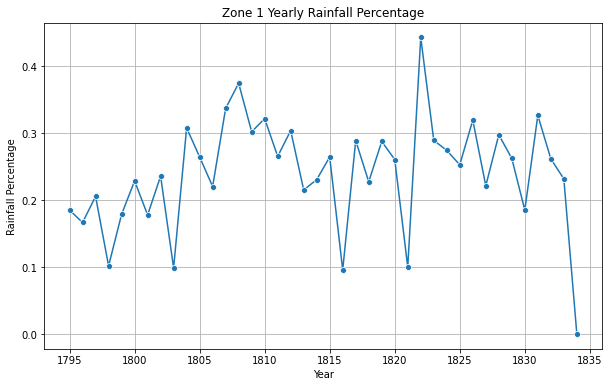

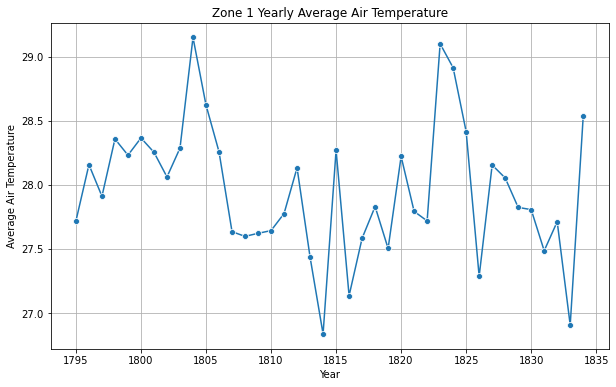

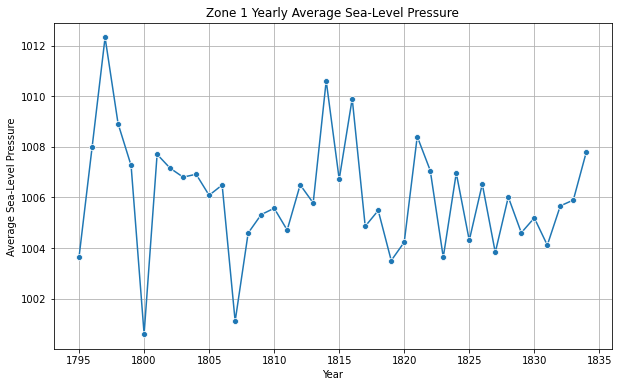

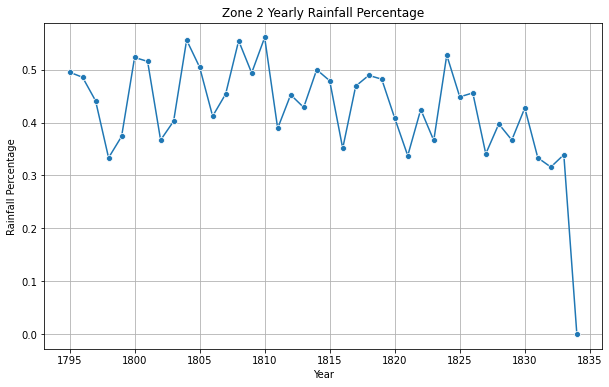

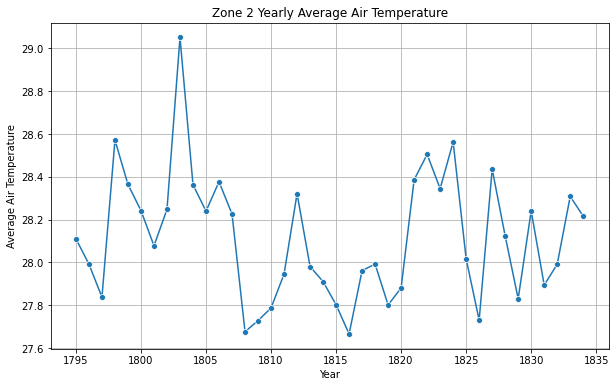

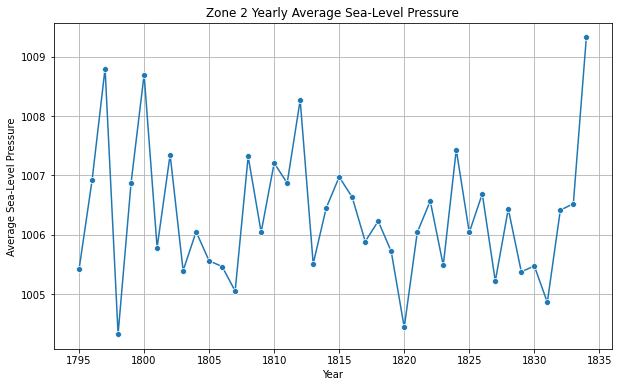

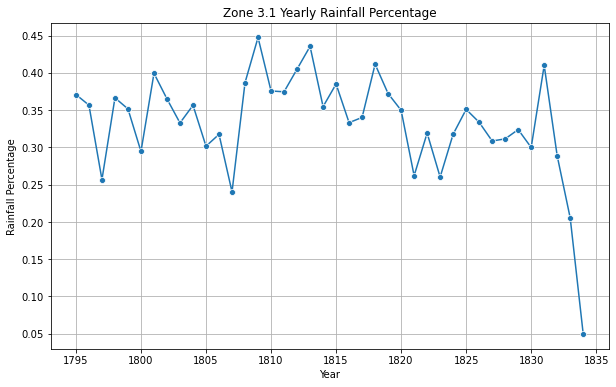

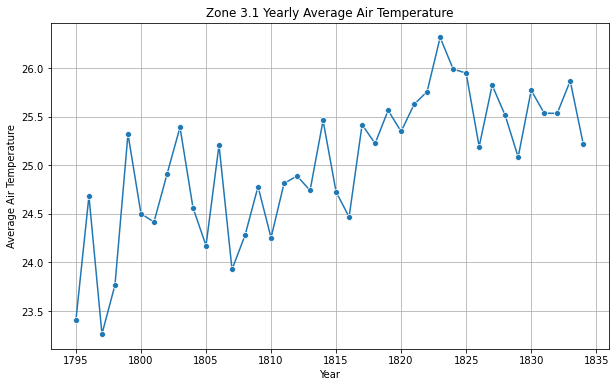

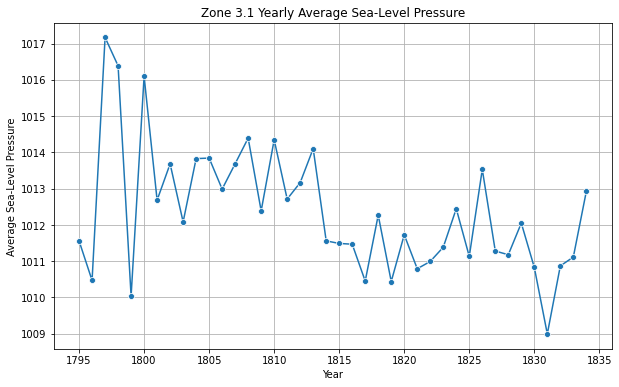

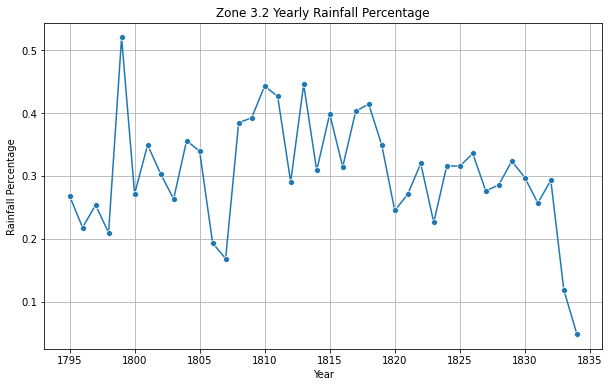

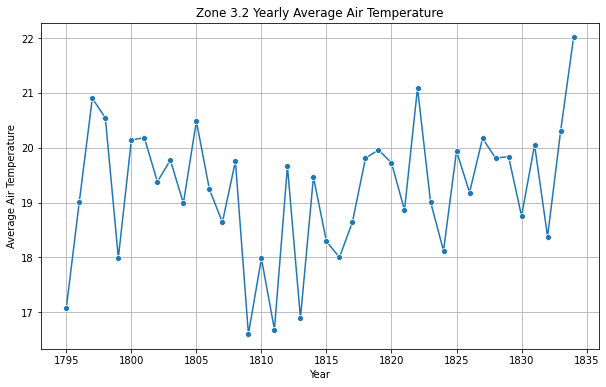

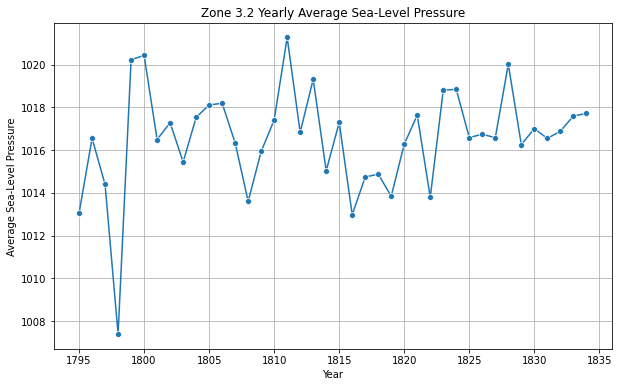

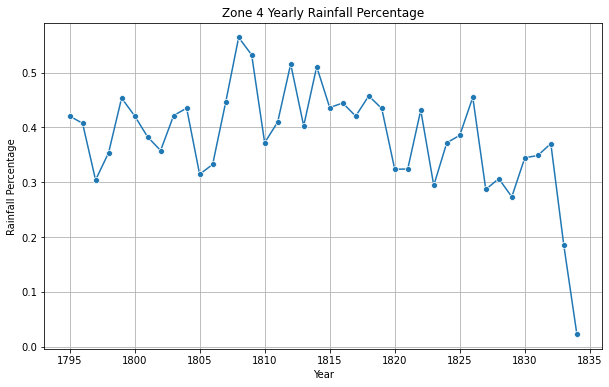

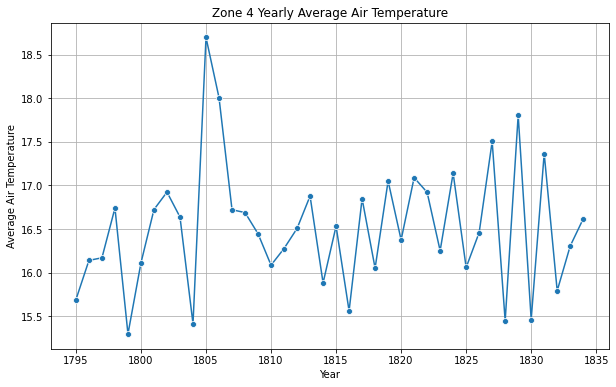

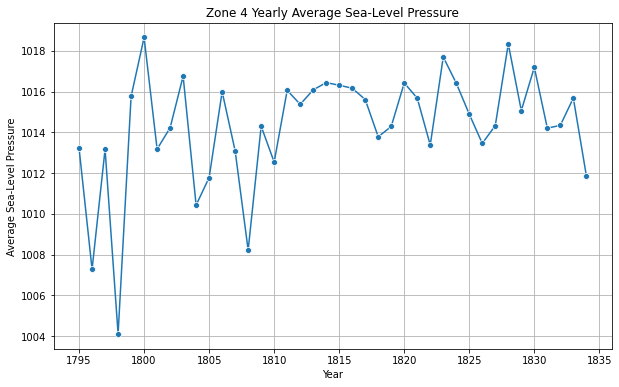

In [26]:
# visualize annual statistics
plot_dir_path = f'{file_dir}/plots/'
os.makedirs(plot_dir_path, exist_ok=True)

for zone in zones:
    zone_annual_df_path = f"{file_dir}zone{zone}_annual_data.csv" 
    zone_annual_df = pd.read_csv(zone_annual_df_path)

    # plot the three stats below
    stats = ["rainfall_percentage", "avg_at", "avg_slp"]
    stat_labels = ["Rainfall Percentage", "Average Air Temperature", "Average Sea-Level Pressure"]
    
    for stat_i, stat in enumerate(stats):
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='year', y=stat, data=zone_annual_df, marker='o')
        plt.title(f'Zone {str(zone)} Yearly {stat_labels[stat_i]}')
        plt.xlabel('Year')
        plt.ylabel(stat_labels[stat_i])
        plt.grid(True)
        plt.savefig(f'{plot_dir_path}zone{zone}_{stat}.jpg')
        plt.show()